In [1]:
%load_ext iventure.magics
%matplotlib inline

session_id: fsaad@probcomp-1.csail.mit.edu_2017-08-17T14:57:15.204371_8


In [2]:
%bayesdb -j regression.3.bdb

u'Loaded: regression.3.bdb'

In [3]:
%mml CREATE TABLE satellites_t FROM 'satellites.csv';
%mml .nullify satellites_t 'NaN'

Nullified 3032 cells


In [4]:
%mml CREATE POPULATION satellites_p FOR satellites_t WITH SCHEMA (GUESS STATTYPES FOR (*));
%mml CREATE METAMODEL satellites_m FOR satellites_p WITH BASELINE crosscat;
%mml INITIALIZE 8 MODELS FOR satellites_m;
%mml ANALYZE satellites_m FOR 250 ITERATION WAIT (OPTIMIZED);

Completed: 250 iterations in 68.334413 seconds.
Completed: 250 iterations in 68.781724 seconds.
Completed: 250 iterations in 71.744592 seconds.
Completed: 250 iterations in 72.097630 seconds.
Completed: 250 iterations in 74.000818 seconds.
Completed: 250 iterations in 75.630957 seconds.
Completed: 250 iterations in 76.900374 seconds.
Completed: 250 iterations in 78.231840 seconds.


""


### Plot a dependence heatmap

In [ ]:
%bql .heatmap ESTIMATE DEPENDENCE PROBABILITY FROM PAIRWISE VARIABLES OF satellites;

### Regress on simulations of Perigee | (Apogee_km, Class_of_Orbit)

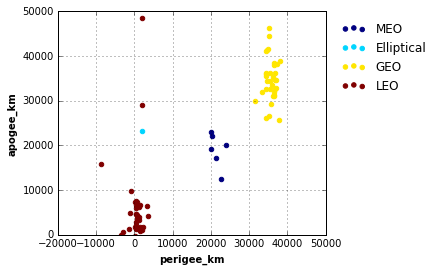

In [3]:
%%bql
.scatter --ymin=0 --ymax=50000
SIMULATE perigee_km, apogee_km, class_of_orbit FROM satellites_p LIMIT 100

In [4]:
%bql REGRESS perigee_km GIVEN (apogee_km, class_of_orbit) USING 100 samples by satellites_p

,variable,coefficient
0,Apogee_km,-0.074088
1,Class_of_Orbit_dum_Elliptical,0.000000
2,Class_of_Orbit_dum_GEO,-9883.397010
3,Class_of_Orbit_dum_LEO,-44966.348669
4,Class_of_Orbit_dum_MEO,-29333.547904
5,intercept,45836.074749


In [5]:
%%bql
.regress_sql --table=satellites
REGRESS perigee_km GIVEN (apogee_km, class_of_orbit) USING 100 samples by satellites_p

SELECT
		20248.3010
	+	-0.1321  *  "Apogee_km"
	+	CASE "Class_of_Orbit"
			WHEN 'MEO' THEN 2497.4597
			WHEN 'LEO' THEN -18944.8857
			WHEN 'GEO' THEN 18678.8735
			WHEN 'Elliptical' THEN 0.0000
			ELSE NULL
		END
FROM "satellites"


### Regress on simulations of Perigee | (Most Probably Dependent Variables)

In [6]:
%%bql
.regress_sql --table=satellites
REGRESS perigee_km GIVEN (
    p.(ESTIMATE * FROM VARIABLES OF satellites_p
        ORDER BY DEPENDENCE PROBABILITY WITH perigee_km DESC LIMIT 6))
USING 100 samples by satellites_p

SELECT
		7803.0240
	+	0.0134  *  "Apogee_km"
	+	CASE "Type_of_Orbit"
			WHEN 'Polar' THEN -2216.1012
			WHEN 'Sun-Synchronous' THEN -1961.8006
			WHEN 'Cislunar' THEN 0.0000
			WHEN 'Molniya' THEN -4397.5839
			WHEN 'Intermediate' THEN -1610.8641
			WHEN 'Retrograde' THEN -3674.2708
			WHEN 'Deep Highly Eccentric' THEN -1102.6799
			ELSE NULL
		END
	+	CASE "Class_of_Orbit"
			WHEN 'MEO' THEN 10545.4412
			WHEN 'LEO' THEN 800.1341
			WHEN 'GEO' THEN 35530.2700
			WHEN 'Elliptical' THEN 0.0000
			ELSE NULL
		END
	+	CASE "Purpose"
			WHEN 'Earth Science/Meteorology' THEN -3997.4361
			WHEN 'Earth Observation/Technology Development' THEN -4030.9020
			WHEN 'Maritime Tracking/Technology Development' THEN -5338.5111
			WHEN 'Technology Development/Communications' THEN -7690.3398
			WHEN 'Surveillance' THEN -1592.5433
			WHEN 'Space Science' THEN -5342.7309
			WHEN 'Technology Demonstration' THEN -5290.5316
			WHEN 'Astrophysics' THEN 0.0000
			WHEN 'Remote Sensing/Earth Science' THEN -3109.0

### Regress on simulations of Perigee | (Everything)

In [7]:
%%bql
.regress_sql --table=satellites
REGRESS perigee_km GIVEN (*)
USING 100 samples by satellites_p

SELECT
		3303.0623
	+	0.1274  *  "Date_of_Launch"
	+	0.1149  *  "Power_watts"
	+	0.1504  *  "Apogee_km"
	+	-160.3933  *  "longitude_radians_of_geo"
	+	-0.2641  *  "Launch_Mass_kg"
	+	271.6884  *  "Eccentricity"
	+	347.9130  *  "Anticipated_Lifetime"
	+	7.0283  *  "Period_minutes"
	+	0.2968  *  "Dry_Mass_kg"
	+	-1175.8977  *  "Inclination_radians"
	+	CASE "Users"
			WHEN 'Government/Commercial' THEN 1766.7178
			WHEN 'Civil/Government' THEN 1302.1828
			WHEN 'Government' THEN -448.3800
			WHEN 'Civil' THEN 0.0000
			WHEN 'Military/Commercial' THEN 2051.2108
			WHEN 'Commecial' THEN 677.6133
			WHEN 'Commercial' THEN 144.9918
			WHEN 'Military/Government' THEN 1675.1098
			WHEN 'Government/Civil' THEN 1586.1911
			WHEN 'Governmnet' THEN -21.8411
			WHEN 'Military' THEN 211.1100
			WHEN 'Commercial/Government' THEN -532.5775
			ELSE NULL
		END
	+	CASE "Type_of_Orbit"
			WHEN 'Polar' THEN -1481.7415
			WHEN 'Sun-Synchronous' THEN -1465.8780
			WHEN 'Cislunar' THEN 0.0000
			WHEN 'Molniya' 